### Milestone 2 Documentation 

Michael Downs, Cameron Hickert, Dianne Lee, Wisoo Song 

#### Introduction

Our software package is an automatic differentiation suite that solves the problem of exactly computing the derivative (to machine precision) for an arbitrary function as long as that function can be expressed as the composition of elementary functions. Precise computation of the gradient is of fundamental importance in the sciences and applied mathematics. Many optimization algorithms rely on gradient information. Indeed, the backpropagation algorithm, which is used to train neural networks, is simply gradient descent on the network's weights. Derivatives are also used in root finding methods such as Newton's method, which are used to numerically solve ordinary differential equations when using implicit methods, among other things. Reliable solutions to ODEs are integral to many of the applied sciences. Automatic differentiation offers an improvement over finite difference methods in that automatic differentiation is exact to machine precision and does not suffer nearly as much from numerical stability issues. AD is also better than symbolic differentiation in that it is less computationally expensive.

#### Background

A derivative of a function represents the instantaneous rate of change of that function at a particular point. A vector containing each partial derivative of a multivariate function is known as a gradient and gives the direction of greatest increase at a particular point. A Jacobian of a vector-valued function is a matrix where each row contains the gradient of the corresponding function.

Forward-mode automatic differentiation of a function can be conceptualized as 

1. Dividing that function into a composition of elementary operations through a computational graph. Basic elementary operations include:

    1. Addition
    2. Multiplication
    3. Subtraction
    4. Division
    5. Exponentiation
    6. Logarithms
    7. Trigonometric functions
    
2. Iteratively applying the chain rule, a result from calculus for computing the derivative of a composite function, at each step of the computational graph from beginning to end in order to propagate the exact values of the partial derivatives to machine precision all the way until the final step of the computational graph, which represents the output of the function. The partial derivatives at the final step are with respect to the function's variables and so represent the value of the gradient (to machine precision) for a chosen value of the function's variables.

The chain rule describes the differentiation of a composite function, where the derivatives are taken at each step as described by the following diagram: 

![chain rule](./chain_rule.png)

The procedure described above allows for computation of particular classes of multivariate, scalar-valued functions, and can easily be extended to vector-valued functions as well -- simply apply the procedure component-wise to each function.

We illustrate both the graph structure of computations as well as the propagation of the derivatives via the chain rule with an example. As each step in automatic differentiation involves a single elementary function, each of these "steps" can be used as input into an outer function. An example of forward-mode automatic differentiation of the function *sin(2x)* can be seen below, where *x<sub>n</sub>* represents the *n*th step of the function. 

![graph struct](./graph_structure.PNG)

| trace | func        | value   | deriv                 |   dx1 |
|-------|-------------|---------|-----------------------|-------|
| *x<sub>1</sub>* | *x<sub>1</sub>*       | 5     | 1           |     1 |
| *x<sub>2</sub>* | 2*x<sub>1</sub>*      | 10    | 2d*x<sub>1</sub>*          |     2 |
| *x<sub>3</sub>* | sin(*x<sub>2</sub>*) | -.544 | cos(*x<sub>2</sub>*)*dx<sub>2</sub>* | -1.68 |

Essentially, we divide the composite function sin(2x) into the elementary operations *x<sub>1</sub>*=x, *x<sub>2</sub>*=2*x<sub>1</sub>*, and *x<sub>3</sub>*=sin(*x<sub>2</sub>*), and we maintain the derivatives along the way. 

It is also useful to give some background on dual numbers. Dual numbers are numbers of the form *a+bε*. In the case of automatic differentiation, the *ε* value can be used to represent the derivative of the function at a particular value *x*. For example, an element *x* would be represented as the vector *(x,x')*. A simple application of a function *f* might look like *f((x,x')) = (f(x), f(x)x')*, making use of the chain rule as described above. 

More generally, forward mode is able to compute the Jacobian of a general vector-valued function. We first introduce a seed vector p in order to calculate the directional derivative in the direction of p. For example, for a simple function *f(x,y)*, p = (1,0) would give us $\frac{d f}{d x}$ while $p = (0,1)$ would give us $\frac{d f}{d y}$. The forward mode calculates the product of the function gradient with this seed vector. 

In particular, the forward mode computes the Jacobian-vector product. The Jacobian matrix is defined $J = \frac{df_i}{ dx_j}$. Thus we can see that the forward mode of automatic differentiation computes the matrix-vector product $Jp$ for the seed vector $p$. 

Given a function $f: \mathbb{R}^m \rightarrow \mathbb{R}^n$, forward mode is more efficient when $n >> m$ as this correponds to the case where the number of functions to evaluate is greater than the number of inputs. Reverse mode on the other hand is more efficient when $n << m$, or the number of inputs is larger than the number of functions. Reverse mode in this case computes the product $J^Tp$ instead. 

#### How To Use

##### Installation

   We utilized the setuptools module to package and upload our module on PyPI. This method is much more robust than simply freezing the dependencies using 'pip freeze > requirements.txt'. In addition to solving messy dependency issues, including the setup.py allows the package to be directly installed to venv or conda env by entering the following line: <br/>
   ##### <center>pip install arrrtomatic</center> <br/>  
                                             
   Detailed information about the project and python kernel compatibility can be found at: https://pypi.org/project/arrrtomatic/ . Notice that arrrtomatic only supports python kernel 3.6 and up.

<img src="./PyPI.png" alt="drawing" width="400"/>

##### Step-by-step demo of the installation
1. If you have not created an environment for your project, create one. We recommend python 3.6 and conda envs.<br/>
<img src="./conda_create.png" alt="drawing" height="150"/><br/>
2. Activate the environment
<img src="./conda_activate.png" alt="drawing" height="150"/><br/>
3. pip install arrrtomatic <br/>
<img src="./successful_install3.png" alt="drawing" width="550"/><br/>
4. import the module with:<br/>
<center> from ARRRtomatic_diff import Autodiff </center><br/>
<img src="./assertion_success2.png" alt="drawing" width="550"/><br/>




##### Using arrrtomatic for Newton's Method
    

    
    

In [2]:
import sys
!{sys.executable} -m pip install --user arrrtomatic

  Using cached https://files.pythonhosted.org/packages/2e/31/ebdab12b04c081360adc91a0d669a2ff5dc2cafdecf522af2542101b4fb1/arrrtomatic-1.0.9-py2.py3-none-any.whl


In [3]:
#Import the modules!
from ARRRtomatic_diff import AutoDiff
from ARRRtomatic_diff.functions import sin, exp, sqrt, log

In [4]:
def f(x, g):
    x = AutoDiff(name='x', val=x)
    auto_diff_results = g(x)

    return auto_diff_results['val'], auto_diff_results['d_x']

def do_newtons_method(x, f,g, tol=1e-6, verbose=0):
    """
    x: initial guess
    f: function that returns value and derivative of f at x
    tol: terminate when the absolute value of f at x is less than or equal to the tol
    """
    num_iters = 1
    while abs(f(x,g)[0]) > tol:
        val, deriv = f(x,g)

        if verbose > 0:
            print(f"Iteration {num_iters} | x: {x:2f} | f(x): {val:2f} | deriv: {deriv:2f}")

        x = x - val/deriv

        

        num_iters += 1

    if verbose > 0:
        print(f"Converged to {x} after {num_iters} iterations\n")

    return x

In [5]:
sin1=do_newtons_method(0.2, f, sin,verbose=1)
sin2=do_newtons_method(2.2, f, sin, verbose=1)

sqrt1=do_newtons_method(0.2, f, log,verbose=1)




Iteration 1 | x: 0.200000 | f(x): 0.198669 | deriv: 0.980067
Iteration 2 | x: -0.002710 | f(x): -0.002710 | deriv: 0.999996
Converged to 6.634450606078646e-09 after 3 iterations

Iteration 1 | x: 2.200000 | f(x): 0.808496 | deriv: -0.588501
Iteration 2 | x: 3.573823 | f(x): -0.418897 | deriv: -0.908034
Iteration 3 | x: 3.112500 | f(x): 0.029089 | deriv: -0.999577
Iteration 4 | x: 3.141601 | f(x): -0.000008 | deriv: -1.000000
Converged to 3.141592653589793 after 5 iterations

Iteration 1 | x: 0.200000 | f(x): -1.609438 | deriv: 5.000000
Iteration 2 | x: 0.521888 | f(x): -0.650303 | deriv: 1.916121
Iteration 3 | x: 0.861273 | f(x): -0.149344 | deriv: 1.161072
Iteration 4 | x: 0.989899 | f(x): -0.010153 | deriv: 1.010204
Iteration 5 | x: 0.999949 | f(x): -0.000051 | deriv: 1.000051
Converged to 0.9999999986897259 after 6 iterations



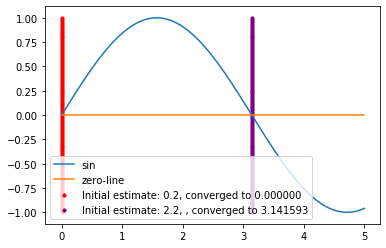

In [8]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
x_s =np.linspace(0, 5, 500)
y_s =np.linspace(-1,1, 100)

sin_dots = np.sin(x_s)
plt.plot(x_s,sin_dots)
plt.plot(x_s,[0]*500)
plt.scatter([sin1]*100, y_s, color="red", s=10)
plt.scatter([sin2]*100, y_s, color="purple", s=10)
plt.legend(["sin", "zero-line", f"Initial estimate: 0.2, converged to {sin1:2f}", f"Initial estimate: 2.2, , converged to {sin2:2f}"])

#### Software Organization 

Our package is organized into two main modules which house the AutoDiff object and the elementary functions, respectively. The functions reside in a subpackage for stylistic reasons so that users can explicitly import these functions from "ARRRtomatic_diff.functions"

Our directory structure is like so:
![updated_directory structure](./updated_directory_struct.png)

The modules are auto_diff.py and funcs.py. auto_diff.py contains the AutoDiff object, which uses operator overloading to implement forward mode automatic differentiation for elementary arithmetic operations. The overloaded operations use duck typing to update the values and partial derivatives correctly depending on whether the other term is an AutoDiff object or a numeric. funcs.py defines elementary functions such as exp and trig functions which use duck typing to appropriately update the value and gradient for supplied AutoDiff objects or simply perform the elementary computation if the argument is a numeric. 

We follow PEP 257 https://www.python.org/dev/peps/pep-0257/ for our documentation.

The tests reside in a directory at the same level as our ARRRtomatic_diff directory and are run via pytest. They are integrated via Travis CI and CodeCov.

Wisoo: discussion abou how to install / setup package:

We use setuptools (https://packaging.python.org/tutorials/packaging-projects/) to package our software. 

See the previous section for a discussion of how to install and use the package. We use PyPI for our remote server for distribution. Hence, our package can easily be installed with pip.

#### Implementation Details

We implemented forward mode of automatic differentiation through operator overloading and defining custom functions for cases where operator overloading does not make sense (i.e. exp, sin, etc.). That is, for each of the elementary operations (add, subtract, etc.), we overloaded the appropriate dunder method in our AutoDiff class. Note that for each of the elementary operations, this also included overloading the reverse operands (`__rmul__`, `__radd__`, etc.). The overloaded methods appropriately update both the value and all the partial derivatives. We accounted only for the real numbers and throw exceptions for cases where the derivative is not defined (division by zero, log of a negative number, etc.).

<img src="operations.png" alt="drawing" width="500"/>

Our core class, AutoDiff, is a representation of a particular row in the trace table, which in turn corresponds to a step in the computational graph. Users interact with it by instantiating named variables that represent root nodes in the computational graph (which corresponds to the inputs to the *n* initial rows of the trace table, where *n* represents the number of input variables). Users can then create arbitrarily complicated functions by manipulating these variables with elementary operations. At every step, the AutoDiff object handles maintaining the derivatives and the function value. Once the user has finished composing a function, the final derived AutoDiff object corresponds to the final row in the trace table and has the function value and gradient.


For example:

```python
from ARRRtomatic_diff import AutoDiff
from ARRRtomatic_diff.functions import sin, exp, sqrt, log

x = AutoDiff(name='x', val=2)
y = AutoDiff(name='y', val=-2)
z = AutoDiff(name='z', val=10)

a = z*exp((x - y)**2 / z)

print(a)
{'val': 49.53032424395115, 'd_z': -2.9718194546370693, 'd_y': -39.62425939516092, 'd_x': 39.62425939516092}
```

The currently implemented operations are:
* addition
* multiplication
* subtraction
* division
* exponentiation

Most other dunder methods will operate directly on the "val" attribute in the trace dictionary (representing the value of the function composition) and will not use the derivatives. For example, if the val is 5, division modulo 2 will return 1.

The AutoDiff class has the properties trace and named_variables. Trace is a dictionary which keeps track of both the gradient and the current value of the function. named_variables is a set which keeps track of all variable names seen thus far in all of AutoDiff objects in the trace table.

The AutoDiff class exposes a few methods to access these properties, namely get_trace, get_named_variables, get_value, and get_gradient. The user can access get_gradient when they have finished writing their computational graph to get the final partials. The AutoDiff class also has the corresponding properties variables, val, and gradient as another way to access trace and named_variables. 

```python
print(a.get_trace())
{'val': 49.53032424395115, 'd_x': 39.62425939516092, 'd_z': -2.9718194546370693, 'd_y': -39.62425939516092}
print(a.get_named_variables())
{'x', 'z', 'y'}
print(a.get_value())
49.53032424395115
print(a.get_gradient())
{'d_x': 39.62425939516092, 'd_z': -2.9718194546370693, 'd_y': -39.62425939516092}
```

The AutoDiff class handles combining two AutoDiff variables through the "private" __update_binary_autodiff method. This function takes as arguments the other AutoDiff object and the rule for updating the the values and the derivatives. The rule for updating the values will be a function of the two values of the AutoDiff objects. The rule for updating the derivatives is a function of the values of the two AutoDiff objects and the relevant partial derivatives as well. This method will combine the named variables for both AutoDiff objects as well. The result is a new AutoDiff object with an updated trace and set of named variables. There is another function, __update_binary_numeric, which handles creating an updated AutoDiff object in case that the other argument is a numeric primitive, which also returns an updated AutoDiff object. This other method also takes as argument an update rule for the values and derivatives but, because the numeric is a constant, some simplifying assumptions are made for the update rule for the derivative.

For example, for multiplication, the update rules are:

```python
@staticmethod
def __mul(x, y):
    return x * y

@staticmethod
def __dmul(x, y, dx, dy):
    return dx*y + x*dy
```

and when an AutoDiff object is multiplied by another entity, the following overloaded dunder method gets called:

```python
def __mul__(self, other):
    try:
        return self.__update_binary_autodiff(other, AutoDiff.__mul, AutoDiff.__dmul)
    except AttributeError:
        return self.__update_binary_numeric(other, AutoDiff.__mul, AutoDiff.__dmul)
```

If a numeric, say, 4.3, were multiplied, dy would be set to 0 for the above derivative update rule.  

The elementary operations interact with the AutoDiff object in a similar manner, and update them via the "private" __update_unary(x, operation, doperation) method while takes as input an AutoDiff variable or primitive numeric and the rules for updating the value and partial derivatives.

For example, the update rules for sin would be:

```python
def sin(x):
    return __update_unary(x, np.sin, np.cos)
```


We use NumPy for elementary computations. Beyond benefitting our package with its speed and versatility, NumPy's prevalence among the Python programming community will allow those interested to more easily understand how our packages operates "under the hood," especially to understand which operators we have overloaded.  

Beyond NumPy, our package does not have other external dependencies. We use pytest for the tests.

In the module funcs.py we implement several elementary functions which use duck typing to either perform the appropriate updates on an AutoDiff object or simply return the operation applied to the argument if the argument was a numeric.

The currently implemented functions are:
* exp
* log
* sqrt
* sin
* cos
* tan
* csc
* sec
* cot
* arcsin
* arccos
* arctan
* arccsc
* arcsec
* arccot
* sinh
* cosh
* tanh
* csch
* sech
* coth
* arcsinh
* arccosh
* arctanh
* arccsch
* arcsech
* arccoth



We have not yet accounted for vector-valued functions. We plan to implement this by creating another class, AutoDiffVector, that combines AutoDiff variable. 

In addition to this, we plan on implementing reverse mode, newton's method, and possibly some optimization routines. 

#### Future Features 

##### Vector valued functions
We plan to extend our current implementation to be able to handle vector valued functions. We will do so by creating a convenience class, AutoDiffVector, that takes a collection of AutoDiff objects and supports broadcasting operations (i.e. scalar operations or vector arithmetic when performing algebraic operations with other AutoDiffVector objects). This class will perform the bookkeeping that keeps track of all of the variables across each function and will also have convenience methods for accessing the Jacobian. We expect that this addition will entail adding a new class to auto_diff.py and the software structure will otherwise not change. Possible challeneges include figuring out design considerations such as whether we will want the AutoDiffVector's dimensions to be mutable.

Example usage:

```python
from ARRRtomatic_diff import AutoDiff, AutoDiffVector
from ARRRtomatic_diff.functions import sin, exp, sqrt

x = AutoDiff(name='x', val=-1)
y = AutoDiff(name='y', val=3)

u = AutoDiffVector((x,y))
v = AutoDiffVector((-y,x))

# performs vector addition, scalar multiplication, and broadcasts the 
# unary operator sin element-wise
z = sin(5*(u + v))

# a numpy array representnug the Jacobian of the vector-valued function
# f1 = x - y
# f2 = y + x
J = z.get_jacobian() 
```


##### Newton's method
We plan to implement Newton's method and possibly other root finding / optimization routines such as SGD (and the special case of backpropagation), time permitting. for an arbitrary vector valued function. We will do so by creating a subpackage, optimization, which will contain modules that implement the optimization routines via functions. For Newton's Method, we will compute the Jacobian/derivative through our AutoDiffVector/AutoDiff objects and use numpy to solve the linear system in the multivariate setting. We do not foresee many challenges in implementing newton's method. 

Example usage:
```python
from ARRRtomatic_diff import AutoDiff
from ARRRtomatic_diff.functions import sin
from ARRRtomatic_diff.optimization import newton

def f(x):
    x = AutoDiff(name='x', val=x)

    auto_diff_results = sin(x)

    return auto_diff_results['val'], auto_diff_results['d_x']
    
do_newtons_method(0.2, f, verbose=1)
Iteration 1 | x: 0.200000 | f(x): 0.198669 | deriv: 0.980067
Iteration 2 | x: -0.002710 | f(x): -0.002710 | deriv: 0.999996
Converged to 6.634450606078646e-09 after 3 iterations
```

##### Reverse mode
We plan to implement the reverse mode as an alternative to forward mode. We will do so by creating another AutoDiff class, AutoDiffRev, and the corresponding reverse AutoDiffVector, AutoDiffVectorRev. The API will be mostly the same - the computational graph will be explicitly constructed via algebraically combining AutoDiffRev variables. The intermediate forward pass values and partials will be calculated through these operations as well as the graph dependency structure. For example:

```python
from ARRRtomatic_diff import AutoDiffRev

x = Var(1)
y = Var(2)
z = x * y
z.partial = 1.0

print(z.value)
print(x.partial)
```

In the above code, the multiplication of x and y keeps track of the forward pass evaluations and immediate partials and also specifies z as a child node of x and y in the dependency graph. Each AutoDiffRev variable will keep track of the operations that it's used in. Unlike our forward mode implementation, dz/dx and dz/dy are maintained in the x and y variables, so they must be kept around. The computation of the partial derivatives of the output with respect to the input is performed recursively. 

The primary challenges to implementing reverse mode will be making the API elegant for the vector-valued case, working with a different mental model for automatic differentiation, and making our reverse mode implementation work with our optimization routines. Our implementation of reverse mode will require adding two additional classes, AutoDiffRev and AutoDiffVectorRev to auto_diff.py. We do not expect to add any new modules. 


##### Checks to ensure that variables of the same name have the same initial value
Currently, we have a rudimentary check to verify that user isn't attempting to combine two AutoDiff variables that have the same named variable but with differing values. It's still possible for a user to create an AutoDiff object with a named variable, perform operations on it, and then combing it with another AutoDiff object with the same named variable but with a different value. We plan to make our software throw an exception when this happens. This will require modifying AutoDiff to keep track of the initial values for each variable and then perform a check when attempting to combine two AutoDiff objects.

Example:

```python
from ARRRtomatic_diff import AutoDiff
from ARRRtomatic_diff.functions import sin

x1 = AutoDiff(name='x', val=1)
x2 = AutoDiff(name='x', val=3)

# will throw an exception
x1 + x2

# does not throw an exception but should
(x1 + x1) + x2
```
